## Generate and visualize synthetic data

- Use `make_moons` to create a 2D binary classification dataset with noise.
- Visualize the data to see the class distribution and nonlinearity.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import make_moons

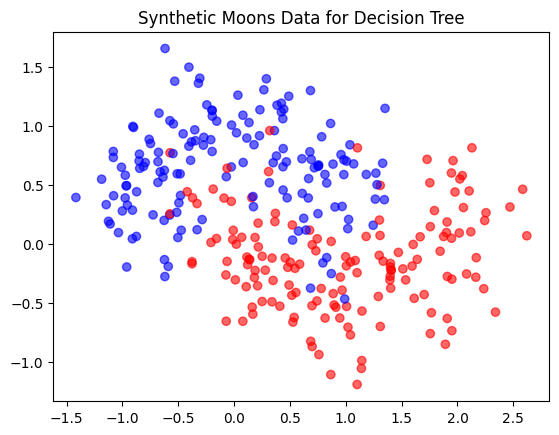

In [10]:
X_dt, y_dt = make_moons(n_samples=300, noise=0.3, random_state=int(time()))

# visualize
plt.scatter(X_dt[:, 0], X_dt[:, 1], c=y_dt, cmap='bwr', alpha=0.6)
plt.title('Synthetic Moons Data for Decision Tree')
plt.show()

## Decision Tree Classifier implementation

- Define a simple decision tree classifier from scratch.
- Includes methods for fitting, predicting, and traversing the tree.
- Uses Gini impurity for splitting.

In [11]:
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value  # for leaf node

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping conditions
        if (depth >= self.max_depth) or (n_labels == 1) or (n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)

        best_feature, best_thresh = None, None
        best_gain = -1

        # For each feature
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_idxs = X[:, feature_index] <= threshold
                right_idxs = X[:, feature_index] > threshold
                gini = self._gini(y[left_idxs]) * len(y[left_idxs]) + self._gini(y[right_idxs]) * len(y[right_idxs])
                if gini < best_gain or best_gain == -1:
                    best_gain = gini
                    best_feature = feature_index
                    best_thresh = threshold

        left_idxs = X[:, best_feature] <= best_thresh
        right_idxs = X[:, best_feature] > best_thresh
        X_left, y_left = X[left_idxs], y[left_idxs]
        X_right, y_right = X[right_idxs], y[right_idxs]

        # Recursively build left and right subtrees
        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)
        return self.Node(feature_index=best_feature, threshold=best_thresh, left=left_subtree, right=right_subtree)

    def _gini(self, y):
        """
        Compute Gini impurity for labels y
        """
        m = len(y)
        if m == 0:
            return 0
        classes, counts = np.unique(y, return_counts=True)
        gini = 1.0 - sum((count / m) ** 2 for count in counts)
        return gini

    def _most_common_label(self, y):
        """
        Return the most common label in y
        """
        most_common = np.bincount(y).argmax()
        return most_common

    def predict(self, X):
        """
        Predict class labels for samples in X
        """
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:  # replace condition with x[node.feature_index] <= node.threshold
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


## Train, evaluate, and analyze the Decision Tree

- Split the data into training and test sets.
- Train the decision tree classifier and make predictions.
- Compute accuracy and (placeholder) confusion matrices for both sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

dt_model = DecisionTree(max_depth=4)
dt_model.fit(X_train_dt, y_train_dt)

y_pred_train = dt_model.predict(X_train_dt)
y_pred_test = dt_model.predict(X_test_dt)

acc_train_dt = np.mean(y_train_dt == y_pred_train)
acc_test_dt = np.mean(y_test_dt == y_pred_test)
conf_train_dt = np.zeros((2, 2), dtype=int)
conf_test_dt = np.zeros((2, 2), dtype=int)

print(f"Decision Tree Train Accuracy: {acc_train_dt}")
print(f"Decision Tree Test Accuracy: {acc_test_dt}")
print(f"Decision Tree Train Confusion Matrix: {conf_train_dt}")
print(f"Decision Tree Test Confusion Matrix: {conf_test_dt}")


Decision Tree Train Accuracy: 0.9208333333333333
Decision Tree Test Accuracy: 0.8666666666666667
Decision Tree Train Confusion Matrix: [[0 0]
 [0 0]]
Decision Tree Test Confusion Matrix: [[0 0]
 [0 0]]
